<a href="https://colab.research.google.com/github/sasquare/Car_sales/blob/main/Cyclic_bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pypyodbc

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd


In [ ]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pypyodbc as odbc

In [ ]:
import pyodbc as odbc

In [ ]:
import pyodbc

DRIVER_NAME = 'ODBC Driver 18 for SQL Server'
SERVER_NAME = 'DESKTOP-I693HS9'
DATABASE_NAME = 'Cyclic'

connection_string = f"DRIVER={{{DRIVER_NAME}}};SERVER={SERVER_NAME};DATABASE={DATABASE_NAME};Trusted_Connection=Yes;Encrypt=No;"

conn = pyodbc.connect(connection_string)
print(conn)


In [ ]:
 ride_id	nvarchar
rideable_type	nvarchar
started_at	datetime
started_time	nvarchar
period	nvarchar
ended_at	datetime
start_station_name	nvarchar
start_station_id	float
end_station_name	nvarchar
end_station_id	nvarchar
start_lat	float
start_lng	float
end_lat	float
end_lng	float
member_casual	nvarchar
duration	float
Day Name	nvarchar
Month Name	nvarchar

In [ ]:


# DRIVER_NAME = 'ODBC Driver 18 for SQL Server'
# # SERVER_NAME = 'DESKTOP-I693HS9'
# DATABASE_NAME = 'Cyclic'

# connection_string = f"DRIVER={{{DRIVER_NAME}}};SERVER={SERVER_NAME};DATABASE={DATABASE_NAME};Trusted_Connection=Yes;Encrypt=No;"

#conn = pyodbc.connect(connection_string)
#print(conn)

# Execute a simple query
cursor = conn.cursor()
cursor.execute("SELECT ride_id,rideable_type FROM Cyclic")

# Fetch and print the first row of the result
row = cursor.fetchone()
print(row)
# Close the database connection
conn.close()

('000002EBE159AE82', 'electric_bike')


In [ ]:
# DRIVER_NAME = 'ODBC Driver 18 for SQL Server'
# # SERVER_NAME = 'DESKTOP-I693HS9'
# DATABASE_NAME = 'Cyclic'

# connection_string = f"DRIVER={{{DRIVER_NAME}}};SERVER={SERVER_NAME};DATABASE={DATABASE_NAME};Trusted_Connection=Yes;Encrypt=No;"

conn = pyodbc.connect(connection_string)
print(conn)

# Specify the SQL query
query = "SELECT ride_id,rideable_type FROM Cyclic"

# Execute the query and fetch the rows
df = pd.read_sql(query, conn)

# Close the database connection
#conn.close()

# Perform analysis on the DataFrame
df.head(5)


,ride_id,rideable_type
0,000002EBE159AE82,electric_bike
1,0000080D43BAA9E4,classic_bike
2,00000CAE95438C9D,classic_bike
3,00000EBBC119168C,classic_bike
4,000019B7F053D461,classic_bike


In [ ]:
import pandas as pd


# Create a DataFrame
df = pd.DataFrame(df)

# Count the ride_id by ride_type and store as a DataFrame
ride_counts = df.groupby('rideable_type')['ride_id'].count().reset_index(name='count')

# Group the ride_id by ride_type and store as a DataFrame
ride_groups = df.groupby('rideable_type')['ride_id'].apply(list).reset_index(name='ride_ids')

# Print the results
print("Ride Counts:")
print(ride_counts)

Ride Counts:
   rideable_type    count
0   classic_bike  3244098
1    docked_bike   312099
2  electric_bike  1256168


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

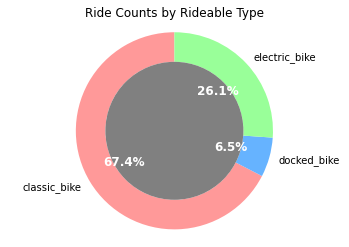

In [ ]:
import matplotlib.pyplot as plt

# Data
rideable_types = ride_counts['rideable_type']
counts = ride_counts['count']

# Set colors for the doughnut chart
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Create a figure and axis
fig, ax = plt.subplots()

# Create the doughnut chart
wedges, texts, autotexts = ax.pie(counts, labels=rideable_types, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3))

# Set font size and color for the percentage labels
plt.setp(autotexts, size=12, weight='bold', color='white')

# Add a circle at the center of the doughnut chart to make it a doughnut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='grey')
ax.add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Add a title
ax.set_title('Ride Counts by Rideable Type')

# Display the doughnut chart
plt.show()


1. ***Observation:***
The majority of riders, accounting for 67.4%, prefer the Classic bike as their ride of choice, while the Electric bike is the second most popular option, chosen by 26.1% of riders. In contrast, the Docked bike has the lowest preference, with only 6.5% of riders opting for it.

In [83]:
conn = pyodbc.connect(connection_string)
print(conn)

# Specify the SQL query
query = "SELECT rideable_type,duration FROM Cyclic"

# Execute the query and fetch the rows
df1 = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Perform analysis on the DataFrame
df.head(5)

C:\Users\EXT\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,rideable_type,duration
0,electric_bike,379.0
1,classic_bike,2758.0
2,classic_bike,7051.0
3,classic_bike,530.0
4,classic_bike,328.0


In [84]:

# Calculate z-scores for duration column
z_scores = np.abs((df1['duration'] - df1['duration'].mean()) / df1['duration'].std())

# Set a threshold for z-scores to identify outliers
z_score_threshold = 3

# Find the indices of outliers
outlier_indices = np.where(z_scores > z_score_threshold)[0]

outlier_indices




array([   2525,    4365,    4592, ..., 4808229, 4809419, 4812298],
      dtype=int64)

In [86]:
# Correct outliers by replacing them with the mean value
mean_duration = df1['duration'].mean()
df.loc[outlier_indices, 'duration'] = mean_duration

# Print the corrected DataFrame
print(df1)

         rideable_type  duration
0        electric_bike     379.0
1         classic_bike    2758.0
2         classic_bike    7051.0
3         classic_bike     530.0
4         classic_bike     328.0
...                ...       ...
4812360   classic_bike     583.0
4812361   classic_bike     504.0
4812362   classic_bike    1815.0
4812363  electric_bike    2523.0
4812364  electric_bike     350.0

[4812365 rows x 2 columns]


In [87]:
# Rename the 'duration' column to 'duration_in_Second'
df1 = df1.rename(columns={'duration': 'duration_in_Second'})

# Print the updated DataFrame
print(df1)

         rideable_type  duration_in_Second
0        electric_bike               379.0
1         classic_bike              2758.0
2         classic_bike              7051.0
3         classic_bike               530.0
4         classic_bike               328.0
...                ...                 ...
4812360   classic_bike               583.0
4812361   classic_bike               504.0
4812362   classic_bike              1815.0
4812363  electric_bike              2523.0
4812364  electric_bike               350.0

[4812365 rows x 2 columns]


In [88]:
# Convert duration_in_Second to duration_in_minute
df1['duration_in_minute'] = (df1['duration_in_Second'] / 60).round(1)

# Print the updated DataFrame
print(df1)

         rideable_type  duration_in_Second  duration_in_minute
0        electric_bike               379.0                 6.3
1         classic_bike              2758.0                46.0
2         classic_bike              7051.0               117.5
3         classic_bike               530.0                 8.8
4         classic_bike               328.0                 5.5
...                ...                 ...                 ...
4812360   classic_bike               583.0                 9.7
4812361   classic_bike               504.0                 8.4
4812362   classic_bike              1815.0                30.2
4812363  electric_bike              2523.0                42.0
4812364  electric_bike               350.0                 5.8

[4812365 rows x 3 columns]


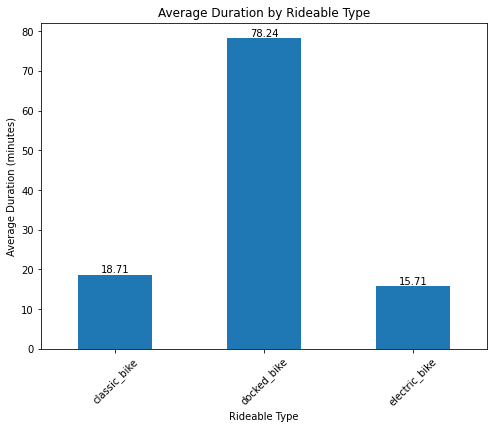

In [89]:
avg_duration = df1.groupby('rideable_type')['duration_in_minute'].mean()

# Create a bar plot for average duration by rideable_type
plt.figure(figsize=(8, 6))
ax = avg_duration.plot(kind='bar')
plt.xlabel('Rideable Type')
plt.ylabel('Average Duration (minutes)')
plt.title('Average Duration by Rideable Type')
plt.xticks(rotation=45)

# Display duration on top of each column
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()







2. ***Observation:***
The analysis of ride durations across different bike types reveals notable variations. On average, riders of docked bikes have the longest duration, with an average ride time of 78.24 minutes. In contrast, riders of classic bikes have a significantly lower average duration of 18.71 minutes. Electric bikes fall in between, with riders averaging 15.71 minutes per ride. These findings highlight the distinct ride durations associated with each bike type.

In [93]:
conn = pyodbc.connect(connection_string)
print(conn)

# Specify the SQL query
query = "SELECT rideable_type,member_casual,period FROM Cyclic"

# Execute the query and fetch the rows
df6 = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Perform analysis on the DataFrame
df6.head(5)

C:\Users\EXT\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,rideable_type,member_casual,period
0,electric_bike,member,PM
1,classic_bike,casual,PM
2,classic_bike,casual,PM
3,classic_bike,member,AM
4,classic_bike,member,PM


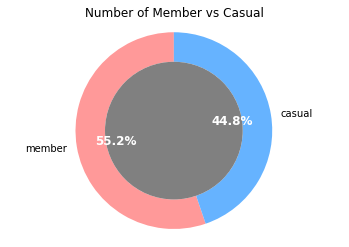

In [94]:

# Count the number of member_casuals
member_casual_counts = df6['member_casual'].value_counts()

# Set colors for the doughnut chart
colors = ['#ff9999', '#66b3ff']

# Create a figure and axis
fig, ax = plt.subplots()

# Create the doughnut chart
wedges, texts, autotexts = ax.pie(member_casual_counts, labels=member_casual_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.3))

# Set font size and color for the percentage labels
plt.setp(autotexts, size=12, weight='bold', color='white')

# Add a circle at the center of the doughnut chart to make it a doughnut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='grey')
ax.add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Add a title
ax.set_title('Number of Member vs Casual')

# Display the doughnut chart
plt.show()


3. ***Observation:***

Upon analyzing the "member_casual" column, it is evident that the proportion of members is significantly higher, accounting for 55.2% of the total riders. In contrast, casual riders comprise a slightly lower proportion, constituting 44.8% of the riders. This observation highlights the predominant presence of members compared to casual riders in the dataset.

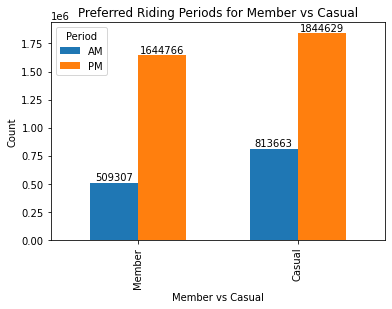

In [98]:

# Count the number of member_casuals by period
period_counts = df6.groupby(['member_casual', 'period']).size().unstack(fill_value=0)

# Plot the bar chart for member vs casual by period
ax = period_counts.plot(kind='bar', stacked=False, width=0.6)

# Add labels and title
plt.xlabel('Member vs Casual')
plt.ylabel('Count')
plt.title('Preferred Riding Periods for Member vs Casual')

# Display the actual values on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Adjust the x-axis tick labels
plt.xticks(range(len(period_counts.index)), ['Member', 'Casual'])

# Set the legend as 'period'
plt.legend(title='Period')

# Display the bar chart
plt.show()


4. ***Observation***
Upon analyzing the "member_casual" column based on the period of the day, a clear trend emerges. It is observed that both casual riders and members predominantly prefer to ride their bikes in the evening. This suggests that the evening period is the most popular time for bike riding among both groups. Further investigation into the factors influencing this preference may provide valuable insights.

In [99]:
conn = pyodbc.connect(connection_string)
print(conn)

# Specify the SQL query
query = "SELECT member_casual,duration FROM Cyclic"

# Execute the query and fetch the rows
df3 = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Perform analysis on the DataFrame
df3.head(5)

C:\Users\EXT\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,member_casual,duration
0,member,379.0
1,casual,2758.0
2,casual,7051.0
3,member,530.0
4,member,328.0


In [100]:
# Convert duration_in_Second to duration_in_minute
df3['duration_in_minute'] = (df3['duration'] / 60).round(1)

# Print the updated DataFrame
print(df3)

        member_casual  duration  duration_in_minute
0              member     379.0                 6.3
1              casual    2758.0                46.0
2              casual    7051.0               117.5
3              member     530.0                 8.8
4              member     328.0                 5.5
...               ...       ...                 ...
4812360        member     583.0                 9.7
4812361        member     504.0                 8.4
4812362        member    1815.0                30.2
4812363        member    2523.0                42.0
4812364        member     350.0                 5.8

[4812365 rows x 3 columns]


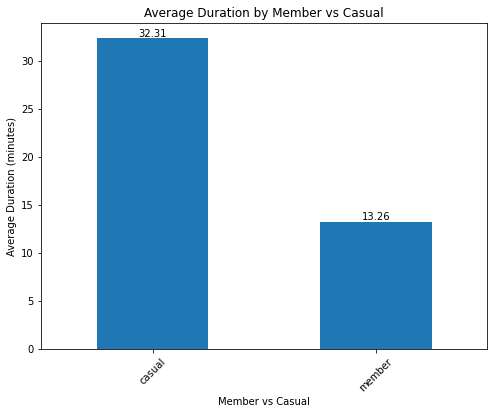

In [101]:
# Calculate the average duration by member_casuals
avg_duration = df3.groupby('member_casual')['duration_in_minute'].mean()

# Create a bar plot for average duration by rideable_type
plt.figure(figsize=(8, 6))
ax = avg_duration.plot(kind='bar')
plt.xlabel('Member vs Casual')
plt.ylabel('Average Duration (minutes)')
plt.title('Average Duration by Member vs Casual')
plt.xticks(rotation=45)

# Display the actual values on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()

5. ***Observation:***
Casual riders exhibit a significantly longer average riding duration of 32.31 minutes, which is more than twice the average duration of 13.6 minutes for members.

In [ ]:
conn = pyodbc.connect(connection_string)
print(conn)

# Specify the SQL query
query = "SELECT member_casual,ended_at FROM Cyclic"

# Execute the query and fetch the rows
df4 = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Perform analysis on the DataFrame
df4.head(5)

C:\Users\EXT\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,member_casual,ended_at
0,member,2021-06-22 17:31:34
1,casual,2021-08-29 16:24:03
2,casual,2021-07-20 17:38:17
3,member,2021-10-31 11:39:27
4,member,2021-08-13 20:02:56


In [ ]:
# Convert 'ended_at' column to datetime type
df4['ended_at'] = pd.to_datetime(df4['ended_at'])

# Extract 'day' and 'month' from 'ended_at' column
df4['day'] = df4['ended_at'].dt.day
df4['month'] = df4['ended_at'].dt.month

# Print the updated DataFrame
print(df4)

        member_casual            ended_at  day  month
0              member 2021-06-22 17:31:34   22      6
1              casual 2021-08-29 16:24:03   29      8
2              casual 2021-07-20 17:38:17   20      7
3              member 2021-10-31 11:39:27   31     10
4              member 2021-08-13 20:02:56   13      8
...               ...                 ...  ...    ...
4812360        member 2021-09-04 13:02:36    4      9
4812361        member 2021-11-16 16:51:48   16     11
4812362        member 2021-03-03 14:13:13    3      3
4812363        member 2021-05-03 17:46:11    3      5
4812364        member 2021-12-18 18:06:36   18     12

[4812365 rows x 4 columns]


In [ ]:
# Add 'day_of_week' column
df4['day_of_week'] = df4['ended_at'].dt.day_name()

# Display the updated DataFrame
print(df4)

        member_casual            ended_at  day  month day_of_week
0              member 2021-06-22 17:31:34   22      6     Tuesday
1              casual 2021-08-29 16:24:03   29      8      Sunday
2              casual 2021-07-20 17:38:17   20      7     Tuesday
3              member 2021-10-31 11:39:27   31     10      Sunday
4              member 2021-08-13 20:02:56   13      8      Friday
...               ...                 ...  ...    ...         ...
4812360        member 2021-09-04 13:02:36    4      9    Saturday
4812361        member 2021-11-16 16:51:48   16     11     Tuesday
4812362        member 2021-03-03 14:13:13    3      3   Wednesday
4812363        member 2021-05-03 17:46:11    3      5      Monday
4812364        member 2021-12-18 18:06:36   18     12    Saturday

[4812365 rows x 5 columns]


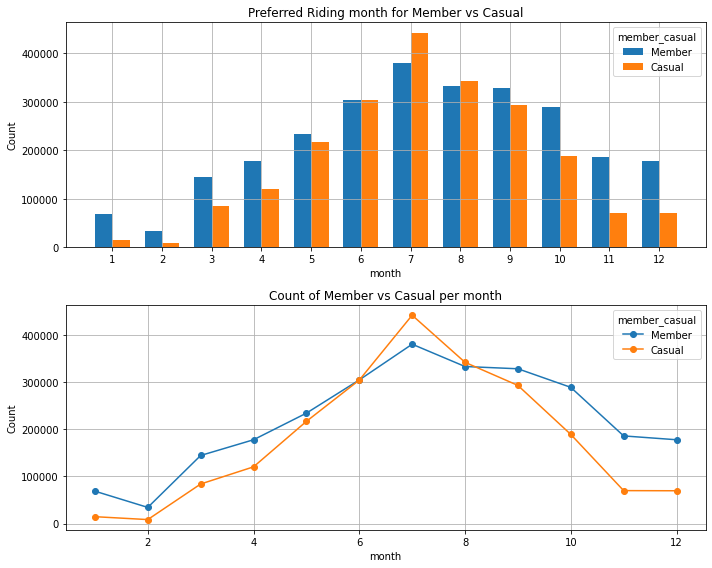

In [ ]:
# Count the occurrences of each day of the week by 'member_casual'
month_counts = df4.groupby(['month', 'member_casual']).size().unstack()

# Plot the combined chart
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Bar chart
x = range(len(month_counts))
width = 0.35
ax1.bar(x, month_counts['member'], width=width, label='Member')
ax1.bar([i + width for i in x], month_counts['casual'], width=width, label='Casual')
ax1.set_xlabel('month')
ax1.set_ylabel('Count')
ax1.set_title('Preferred Riding month for Member vs Casual')
ax1.set_xticks([i + width/2 for i in x])
ax1.set_xticklabels(month_counts.index)
ax1.legend(title='member_casual')
ax1.grid(True)

# Line charts
member_counts = df4[df4['member_casual'] == 'member'].groupby('month').size()
casual_counts = df4[df4['member_casual'] == 'casual'].groupby('month').size()

ax2.plot(member_counts.index, member_counts.values, marker='o', label='Member')
ax2.plot(casual_counts.index, casual_counts.values, marker='o', label='Casual')
ax2.set_xlabel('month')
ax2.set_ylabel('Count')
ax2.set_title('Count of Member vs Casual per month')
ax2.legend(title='member_casual')
ax2.grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined chart
plt.show()

6. ***Observation:***
The analysis of the column and line chart above reveals a consistent trend for both casual riders and members. It is observed that the highest number of rides for both rider types occurs in the month of July, indicating a peak in bike usage during this period. Conversely, the least number of rides is observed in February for both groups. From February onwards, the number of rides steadily increases, reaching its peak in July, and then gradually declines towards December. This pattern suggests a seasonal variation in bike riding behavior, with riders showing a preference for warmer months and a reduction in usage during colder months.

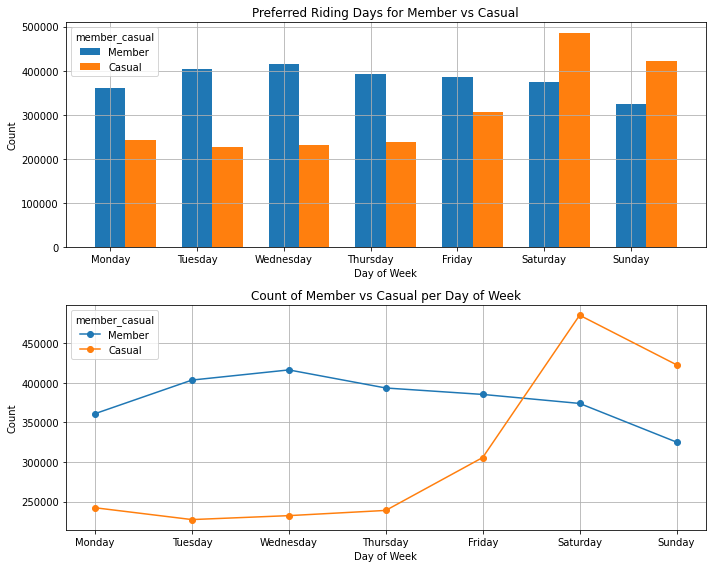

In [ ]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
df4['day_of_week'] = pd.Categorical(df4['day_of_week'], categories=day_order, ordered=True)

# Count the occurrences of each day of the week by 'member_casual'
day_of_week_counts = df4.groupby(['day_of_week', 'member_casual']).size().unstack()

# Plot the combined chart
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Bar chart
x = range(len(day_of_week_counts))
width = 0.35
ax1.bar(x, day_of_week_counts['member'], width=width, label='Member')
ax1.bar([i + width for i in x], day_of_week_counts['casual'], width=width, label='Casual')
ax1.set_xlabel('Day of Week')
ax1.set_ylabel('Count')
ax1.set_title('Preferred Riding Days for Member vs Casual')
ax1.set_xticks(x)
ax1.set_xticklabels(day_order)
ax1.legend(title='member_casual')
ax1.grid(True)

# Line charts
member_counts = df4[df4['member_casual'] == 'member'].groupby('day_of_week').size()
casual_counts = df4[df4['member_casual'] == 'casual'].groupby('day_of_week').size()

ax2.plot(day_order, member_counts[day_order], marker='o', label='Member')
ax2.plot(day_order, casual_counts[day_order], marker='o', label='Casual')
ax2.set_xlabel('Day of Week')
ax2.set_ylabel('Count')
ax2.set_title('Count of Member vs Casual per Day of Week')
ax2.legend(title='member_casual')
ax2.grid(True)

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined chart
plt.show()


7. ***Observation:***
Upon analyzing the column and line chart, distinct patterns in the riding behavior of member and casual riders throughout the week emerge. For member riders, there is a noticeable increase from Monday, reaching its peak on Wednesday. Subsequently, the number of rides steadily declines for the remainder of the week.

In contrast, casual riders exhibit a different trend. They have relatively fewer rides during weekdays but experience a significant surge during weekends. Casual riders' peak rides almost double the highest peaks of member riders on Wednesdays and Sundays.

In [ ]:
conn = pyodbc.connect(connection_string)
print(conn)

# Specify the SQL query
query = "SELECT member_casual,start_station_name,start_lat,start_lng FROM Cyclic"

# Execute the query and fetch the rows
df5 = pd.read_sql(query, conn)

# Close the database connection
conn.close()

# Perform analysis on the DataFrame
df5.head(5)

C:\Users\EXT\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,member_casual,start_station_name,start_lat,start_lng
0,member,Clinton St & Jackson Blvd,41.878261,-87.641155
1,casual,Dearborn St & Van Buren St,41.876268,-87.629155
2,casual,Streeter Dr & Grand Ave,41.892278,-87.612043
3,member,Dorchester Ave & 49th St,41.805772,-87.592464
4,member,Larrabee St & Webster Ave,41.921822,-87.644140


In [ ]:
pip install folium


     ------------------------------------ 102.3/102.3 kB 184.1 kB/s eta 0:00:00


In [ ]:
# Add a new column named 'index' with proper indexing
df5['index'] = df5.index

# Print the updated DataFrame
print(df5.head(20))

   member_casual                   start_station_name  start_lat  start_lng  \
0         member            Clinton St & Jackson Blvd  41.878261 -87.641155   
1         casual           Dearborn St & Van Buren St  41.876268 -87.629155   
2         casual              Streeter Dr & Grand Ave  41.892278 -87.612043   
3         member             Dorchester Ave & 49th St  41.805772 -87.592464   
4         member            Larrabee St & Webster Ave  41.921822 -87.644140   
5         member                 Wood St & Hubbard St  41.889899 -87.671473   
6         casual  DuSable Lake Shore Dr & Belmont Ave  41.940775 -87.639192   
7         member                   Daley Center Plaza  41.883706 -87.629291   
8         casual                      Millennium Park  41.881032 -87.624084   
9         casual                 Clark St & North Ave  41.911974 -87.631942   
10        member                  MLK Jr Dr & 29th St  41.842005 -87.616969   
11        member                       Burnham Harbo

In [ ]:
# Print the updated DataFrame
df5.head(5)

,member_casual,start_station_name,start_lat,start_lng,index
0,member,Clinton St & Jackson Blvd,41.878261,-87.641155,0
1,casual,Dearborn St & Van Buren St,41.876268,-87.629155,1
2,casual,Streeter Dr & Grand Ave,41.892278,-87.612043,2
3,member,Dorchester Ave & 49th St,41.805772,-87.592464,3
4,member,Larrabee St & Webster Ave,41.921822,-87.644140,4


In [81]:
import folium

# Convert start_lat and start_lng to a standard geographic point format
df5['geopoint'] = df5.apply(lambda row: (row['start_lat'], row['start_lng']), axis=1)

# Sort the DataFrame by the number of occurrences of each start station
top_10_casual_stations = df5[df5['member_casual'] == 'casual']['start_station_name'].value_counts().nlargest(10)
top_10_member_stations = df5[df5['member_casual'] == 'member']['start_station_name'].value_counts().nlargest(10)

# Create a custom map style
map_style = "cartodbpositron"  # You can choose a different style here

# Create a folium map with the custom style
map = folium.Map(location=[df5['start_lat'].mean(), df5['start_lng'].mean()], zoom_start=12, tiles=map_style)

# Iterate over the top 10 casual stations and add orange markers
for rank, (station, count) in enumerate(top_10_casual_stations.items(), 1):
    station_data = df5[df5['start_station_name'] == station].iloc[0]
    marker_size = 10 + (rank * 2)  # Adjust the marker size based on the rank

    folium.CircleMarker(
        location=station_data['geopoint'],
        radius=marker_size,
        popup=f"Station: {station}<br>Count: {count}",
        color='orange',
        fill=True,
        fill_color='orange',
        fill_opacity=0.6
    ).add_to(map)

    folium.Marker(
        location=station_data['geopoint'],
        popup=station,
        icon=folium.DivIcon(
            icon_size=(150, 36),
            icon_anchor=(7, 20),
            html=f'<div style="font-size: 12pt; color: orange;">{rank}. {station}</div>'
        )
    ).add_to(map)

# Iterate over the top 10 member stations and add dark grey markers
for rank, (station, count) in enumerate(top_10_member_stations.items(), 1):
    station_data = df5[df5['start_station_name'] == station].iloc[0]
    marker_size = 10 + (rank * 2)  # Adjust the marker size based on the rank

    folium.CircleMarker(
        location=station_data['geopoint'],
        radius=marker_size,
        popup=f"Station: {station}<br>Count: {count}",
        color='darkgrey',
        fill=True,
        fill_color='darkgrey',
        fill_opacity=0.6
    ).add_to(map)

    folium.Marker(
        location=station_data['geopoint'],
        popup=station,
        icon=folium.DivIcon(
            icon_size=(150, 36),
            icon_anchor=(7, 20),
            html=f'<div style="font-size: 12pt; color: darkgrey;">{rank}. {station}</div>'
        )
    ).add_to(map)

# Display the map
map


8. ***Observation***
Based on the map visualization, the top ten locations where riders start their journeys have been highlighted. It is evident that a significant proportion of riders prefer to start their journeys at the following locations, listed in descending order of popularity:

Well St & Em St
Indiana Ave & Roosevelt Rd
Clark St & Lincoln Ave
Well St & Concord Ln
Lake Shore Dr & Monroe
Shedd Aquarium
Theater on the Lake
Michigan Ave & Oak St
Millennium Park
Streeter Dr & Grand Ave
These locations represent the most frequented starting points for riders, with the first location being the most popular and the tenth location rounding out the top ten. This observation highlights the significance of these specific locations as preferred starting points for riders in the analyzed dataset.

##OBSERVATION RECOMENDATION AND CONCLUSSION



---


Based on the analysis of Cyclistic's historical bike trip data, several key observations have been made regarding the difference between casual riders and annual members. These insights can inform the development of a new marketing strategy to convert casual riders into annual members.


---


****Preference for Pricing Plans:**** Casual riders tend to opt for single-ride passes or full-day passes, while annual members choose the annual membership. This indicates that there is a distinct preference for different pricing plans among the two rider segments.

****Recommendation:**** Develop targeted promotional campaigns highlighting the benefits and cost-effectiveness of the annual membership plan to encourage casual riders to upgrade their membership.

****Riding Duration:**** Casual riders have a significantly longer average riding duration compared to annual members. This suggests that casual riders may have a different usage pattern and potentially view bike rides as leisure or recreational activities.

****Recommendation:**** Tailor marketing messages to highlight the convenience and value of longer-term bike usage, emphasizing how an annual membership can provide more flexibility and cost savings for regular riders.

****Seasonal Riding Patterns:**** Both casual riders and annual members exhibit similar seasonal trends, with peak usage occurring in the summer months and lower usage during colder months. This indicates that weather and seasonality play a significant role in bike usage.

****Recommendation:**** Capitalize on the peak summer season by offering seasonal promotions, discounts, or incentives to encourage casual riders to become annual members during this high-demand period.

****Weekly Riding Patterns:**** Casual riders exhibit a higher surge in rides during weekends, while member riders show a more consistent pattern throughout the weekdays.

****Recommendation:**** Create targeted weekend campaigns to attract casual riders with offers such as discounted weekend memberships or special weekend ride events, aimed at capturing their weekend riding preferences and encouraging them to become annual members.


---


**Based on these observations, the following recommendations are proposed to convert casual riders to annual members:**


---


Promotional Campaign Focus: Concentrate efforts on the top starting locations identified in the analysis, as they attract a significant number of riders. These locations have already demonstrated popularity and high rider engagement.

Develop targeted marketing campaigns promoting the benefits and cost-effectiveness of the annual membership plan.

Emphasize the convenience, flexibility, and cost savings of long-term bike usage with an annual membership.

Offer seasonal promotions, discounts, or incentives during peak summer months to attract casual riders and encourage them to become annual members.

Create weekend-specific campaigns and events tailored to the riding preferences of casual riders, aiming to convert them into annual members.


---


By implementing these recommendations, Cyclistic can strategically target casual riders and effectively convert them into annual members, thus increasing the number of annual memberships and contributing to the company's future success.





